<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [11]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

In [22]:
# additional imports
from bs4 import BeautifulSoup as bsoup
from spacy.tokenizer import Tokenizer
from sklearn.neighbors import NearestNeighbors
import matplotlib

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [13]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## 2) Use Spacy to tokenize / clean the listings 

In [19]:
nlp = spacy.load('en_core_web_lg')

In [37]:
df_jobs = pd.read_csv('data/job_listings.csv')
df_jobs.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [94]:
# Removing html formatting
df_jobs['cleaned'] = df_jobs['description'].apply(lambda x: bsoup(x, 'html.parser').text)

In [95]:
#Looking... better
df_jobs['cleaned'][2]

"b'As a Data Scientist you will be working on consulting side of our business. You will be responsible for analyzing large, complex datasets and identify meaningful patterns that lead to actionable recommendations. You will be performing thorough testing and validation of models, and support various aspects of the business with data analytics.\\nAbility to do statistical modeling, build predictive models and leverage machine learning algorithms.\\nThis position will combine the typical Data Scientist math and analytical skills, with research, advanced business, communication, and presentation skills.\\nPrimary job location is in Sacramento, but work-from-home option is available.\\n\\nQualifications\\nBachelors, MS or PhD in a relevant field (Computer Science, Engineering, Statistics, Physics, Applied Math)\\nExperience in R and/or Python is preferred'"

In [96]:
#Still a lot of unecessary characters
df_jobs['cleaned'] = df_jobs['cleaned'].apply(lambda x: re.sub(r'\\n', '',x))
df_jobs['cleaned'] = df_jobs['cleaned'].apply(lambda x: re.sub(r'b\'', '',x))
#There were quite a few periods connecting two words
df_jobs['cleaned'] = df_jobs['cleaned'].apply(lambda x: re.sub(r'\.', ' ',x))
#regex to remove all non-alphanumeric characters except spaces
#Oh boy do I hate how absolutely unintuitive that was to find
df_jobs['cleaned'] = df_jobs['cleaned'].apply(lambda x: re.sub(r'([^\s\w]|_)+', '',x))

In [97]:
tokenizer = Tokenizer(nlp.vocab)

In [98]:
tokens = []

for item in tokenizer.pipe(df_jobs['cleaned'], batch_size=500):
    doc_tokens = []
    for token in item:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.lemma_.lower())
    tokens.append(doc_tokens)

df_jobs['tokens'] = tokens

In [103]:
#Needs to be in 'csv' form to vectorize
df_jobs['tokens'] = df_jobs['tokens'].apply(lambda x: ','.join(str(item) for item in x))

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [105]:
vectorizer = CountVectorizer()

vectorizer.fit(df_jobs['tokens'])

dtm = vectorizer.transform(df_jobs['tokens'])

dtm = pd.DataFrame(dtm.todense(), columns=vectorizer.get_feature_names())

In [107]:
# clearly I didn't clean this as well as I could have. I'll circle back at the end.
dtm.head()

,02,02115job,030microsoft,031819,032519,041819,06366,10,100,1000,...,zeus,zf,zfxe2x80x99s,zheng,zillow,zillows,zonesability,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [118]:
most_common_words = dtm.sum().sort_values(ascending=False)[:15]

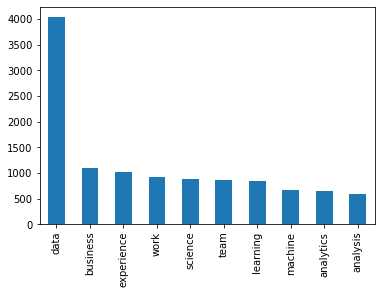

In [117]:
# Who would have guessed?
most_common_words.plot.bar()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [119]:
tfidf = TfidfVectorizer(min_df=0.025, max_df=.975, stop_words='english')

dtm = tfidf.fit_transform(df_jobs['tokens'])

In [121]:
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

In [122]:
dtm.head()

,10,100,12,2019,30,3rd,40,401k,500,600,...,xe2x80x9cbig,year,years,yearsxe2x80x99,york,youll,youre,youxe2x80x99ll,youxe2x80x99re,youxe2x80x99ve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.06867,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.149359,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [123]:
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [124]:
my_query = """
We give you a lot of numbers, you give us fewer numbers.
You'll use python, and only base python, no additional packages.
We just need you to do basic arithmetic for your job, which you will work
4 hour a day, 4 days a week. Your remaining time will be spent utilizing our vast 
resources to work on personal projects of interest, which we claim no ownership of.
Fridays are casual. VERY casual. Don't even come in. Take a day off, you earned it, buddy.
"""

In [125]:
query = tfidf.transform([my_query])

nn.kneighbors(query.todense())

(array([[1.31817423, 1.32618255, 1.3304971 , 1.33183781, 1.33558894]]),
 array([[160,  67, 337,  84, 271]], dtype=int64))

In [128]:
#Lets see this dream job!
#... okay, not a perfect match
df_jobs['cleaned'][160]

'Our core challenges come from intersecting our growing internal datasets on user behavior and real time crime fire and medical incidents with large messy external datasets from governmental and private sourcesWork with a wide array of realworld data sources with an inclination towards experimentation to find new and better data sources that allow us to further customize our usersxe2x80x99 notifications and overall experienceWork with the executive team in support of our mission by helping inform Mayors Governors Chiefs of Police and other public figures with dataled analysis of the impact of Citizen on crimeLead projects that derive value from our unique rich and rapidly growing dataDistilling questions wrangling data and driving decisions with data analyticsWork with Engineering to evangelize data best practices and implement data analytics solutionsWorking with Product to inform prioritization of roadmap through data analyticsRequirementsBachelorxe2x80x99s Degree in Computer Science

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 